<a href="https://colab.research.google.com/github/digitaldaimyo/FastSAM/blob/main/FastSAM_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!git clone https://github.com/digitaldaimyo/FastSAM

fatal: destination path 'FastSAM' already exists and is not an empty directory.


In [2]:
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 688, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 688 (delta 121), reused 120 (delta 111), pack-reused 526
Receiving objects: 100% (688/688), 65.98 MiB | 46.99 MiB/s, done.
Resolving deltas: 100% (396/396), done.


In [3]:
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2023-08-26 01:24:52--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 18.172.134.4, 18.172.134.124, 18.172.134.24, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1693272292&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5MzI3MjI5Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2

In [5]:
!pip install -r FastSAM/requirements.txt
!pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-mryog_u1
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-mryog_u1
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done


In [11]:
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

--2023-08-26 01:34:58--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg.1’

dog.jpg.1           100%[===================>]  97.51K  --.-KB/s    in 0.02s   

2023-08-26 01:34:58 (5.90 MB/s) - ‘images/dog.jpg.1’ saved [99846/99846]



In [43]:

import numpy as np

#Reading an image (you can use PNG or JPG)
img = cv2.imread("images/bolt.jpg")

#Getting the bigger side of the image
s = max(img.shape[0:2])

#Creating a dark square with NUMPY
f = np.zeros((s,s,3),np.uint8)

#Getting the centering position
ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2

#Pasting the 'image' in a centering position
f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img

dim = (1024, 1024)

# resize image
resized = cv2.resize(f, dim, interpolation = cv2.INTER_AREA)

cv2.imwrite("images/boltsq.jpg",resized)

True

In [6]:
import matplotlib.pyplot as plt
import cv2

In [44]:
image = cv2.imread('images/boltsq.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

1024 1024


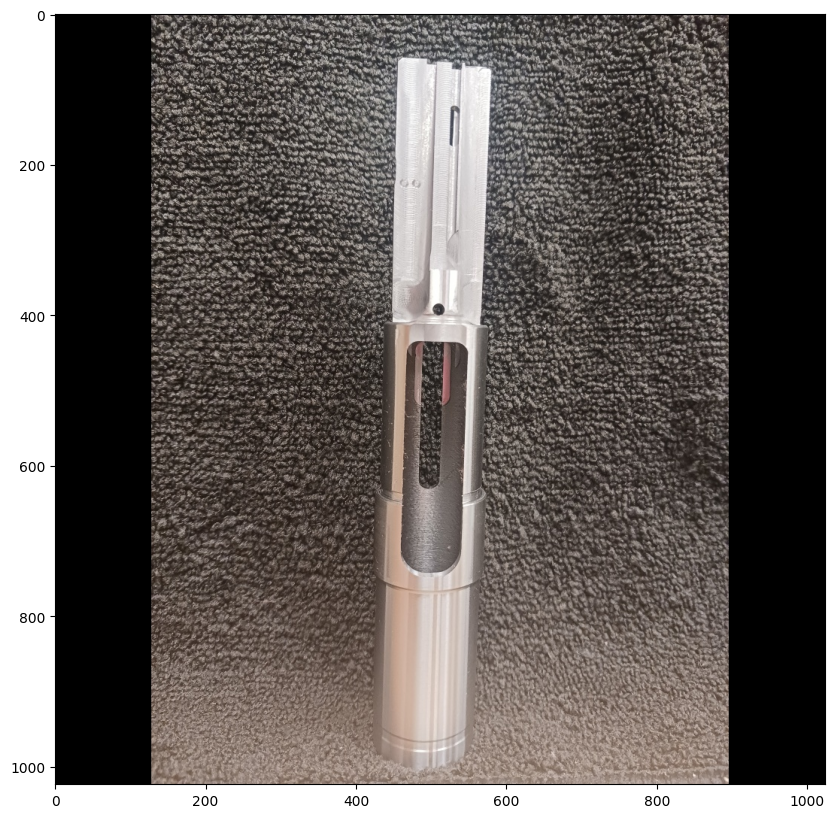

In [45]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.imshow(image)

"--imgsz 1024" means the input image size is 1024. Our model was trained on a size of 1024. You can change it to any size you want to input. Using other sizes would produce different segmentation results.

In [56]:
!python FastSAM/Inference.py  --model_path FastSAM.pt --img_path ./images/boltsq.jpg --imgsz 1024 --box_prompt "[[400,1,200,1023]]" --better_quality True --withContours True


0: 1024x1024 10 objects, 11452.1ms
Speed: 8.3ms preprocess, 11452.1ms inference, 107.3ms postprocess per image at shape (1, 3, 1024, 1024)


In [58]:
!python FastSAM/Inference.py  --model_path FastSAM.pt --img_path ./images/boltsq.jpg --imgsz 1024 --better_quality True --withContours True


0: 1024x1024 10 objects, 15074.6ms
Speed: 7.5ms preprocess, 15074.6ms inference, 97.9ms postprocess per image at shape (1, 3, 1024, 1024)


1024 1024


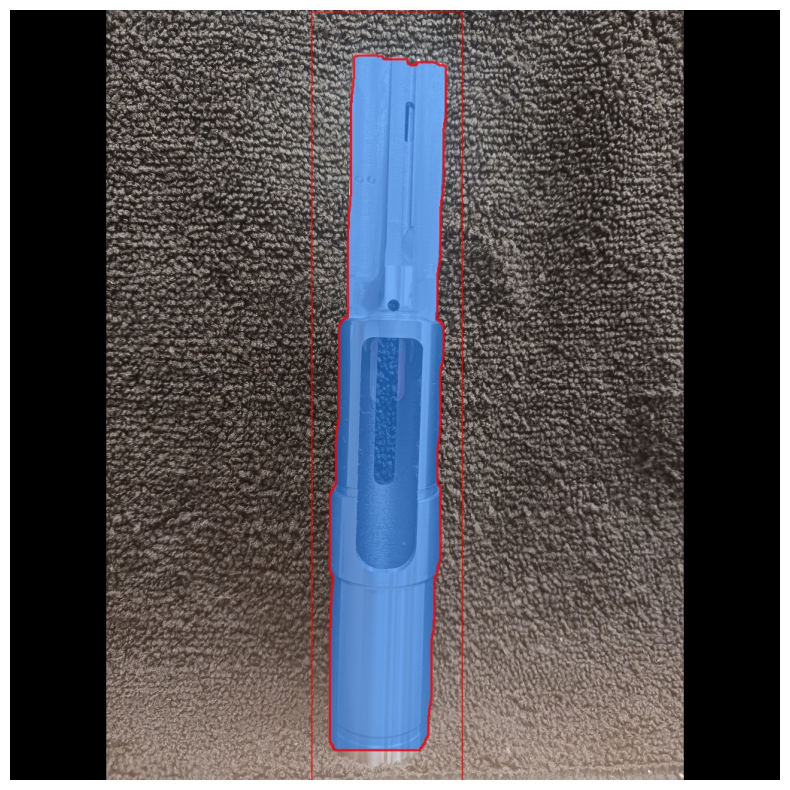

In [57]:
image = cv2.imread('output/boltsq.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_w, original_h)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(image)